# Further testings after 2023-01-27 (MSFD Board of Experts meeting)
## Analyse - settings - 2023
# Baltic Sea - Eutrohpication - DIVAnd - 2023
### Testar distance to coast

#### Add necessary packages

In [1]:
using DIVAnd
using PyPlot
using NCDatasets
using Dates
using Statistics
using DelimitedFiles
using DataStructures
using Printf
using Missings

#### Choose parameter (markdown/code)

### Phosphate ###

varname = "Water body phosphate"
varname_odv = "Water body phosphate"
varname_ns = "Water body phosphate"
savevar = "po4"
sdnp35 = "SDN:P35::EPC00007"
sdnp02 = "SDN:P02::PHOS"
doi = "10.6092/E5BFC6FD-F287-4E1D-81AE-6AF0EA3F1EEF"
vmin_ = 0.;
vmax_ = 1.;
unit = "umol/l";
res = 50.;
data_profiles = "C:/offline_kw/EK5/DIVAnd_EK5_offline/po4_data_from_BALTIC_eutrophication_profiles_20221011.txt";
yearlist = [y:y+5 for y in 1955:2016]; #[y:y+5 for y in 1975:2021];
yearlist_back = [y:y+5 for y in 1955:2021];
datafile_ns = "C:/offline_kw/EK5/DIVAnd_EK5_offline/data_from_1deg_North_Sea_profiles_Nutrients_QA.txt";

### Silicate ###

varname = "Water body silicate"
varname_odv = "Water body silicate"
varname_ns = "Water body silicate"
savevar = "sio3"
sdnp35 = "SDN:P35::EPC00008"
sdnp02 = "SDN:P02::SLCA"
doi = "10.6092/C237ECE0-998E-463B-85D9-EBE8B5B008BB"
vmin_ = 10;
vmax_ = 40;
unit = "umol/l";
res = 300.;
data_profiles = "C:/offline_kw/EK5/DIVAnd_EK5_offline/onlysi_data_from_BALTIC_eutrophication_profiles_20230207.txt";
yearlist = [y:y+5 for y in 1965:2016]; #[y:y+5 for y in 1975:2021];
yearlist_back = [y:y+5 for y in 1962:2021];
datafile_ns = "C:/offline_kw/EK5/DIVAnd_EK5_offline/data_from_1deg_North_Sea_profiles_Nutrients_QA.txt";

### DIN ###

varname = "Water body dissolved inorganic nitrogen"
varname_odv = "Water body dissolved inorganic nitrogen (DIN)"
varname_ns = "Aggregated DIN NH3 optional"
savevar = "DIN"
sdnp35 = "SDN:P35::EPC00198"
sdnp02 = "SDN:P02::TDIN"
doi = "10.6092/62BA9D08-2AD6-4742-8FA6-FDBB25585E5C"
vmin_ = 0.;
vmax_ = 20.;
unit = "umol/l";
res = 300.;
data_profiles = "C:/offline_kw/EK5/DIVAnd_EK5_offline/din_data_from_BALTIC_eutrophication_profiles_20221011.txt" 
yearlist = [y:y+5 for y in 1975:2016];
yearlist_back = [y:y+5 for y in 1975:2021];
datafile_ns = "C:/offline_kw/EK5/DIVAnd_EK5_offline/data_from_1deg_North_Sea_profiles_Nutrients_QA.txt";

In [2]:
### Oxygen ###

varname = "Water body dissolved oxygen concentration"
varname_odv = "Water body dissolved oxygen concentration"
varname_ns = "Water body dissolved oxygen concentration"
savevar = "O2"
sdnp35 = "SDN:P35::EPC00002"
sdnp02 = "SDN:P02::DOXY"
doi = "10.6092/B5BB9EA1-4BDA-48A1-92B6-03645AC12FAE"
vmin_ = 200.;
vmax_ = 500.;
unit = "umol/l";
res = 800.;
data_profiles = "C:/offline_kw/EK5/DIVAnd_EK5_offline/onlyoxy_data_from_BALTIC_eutrophication_profiles_20230207.txt" 
yearlist = [y:y+5 for y in 1960:2016] #1960:2016];
yearlist_back = [y:y+5 for y in 1950:2021];
datafile_ns = "C:/offline_kw/EK5/DIVAnd_EK5_offline/data_from_1deg_North Sea_non-nutrient_data_from_profiles.txt";

### Chlorophyll ###

varname = "Water body chlorophyll-a"
varname_odv = "Water body chlorophyll-a"
varname_ns = "Water body chlorophyll-a"
savevar = "chl"
sdnp35 = "SDN:P35::EPC00105"
sdnp02 = "SDN:P02::CPWC"
doi = "10.6092/66DCF80F-383C-4C70-842A-80EEAD8BD293"
vmin_ = 0;
vmax_ = 20;
unit = "mg/m3";
res = 300.;
data_profiles = "C:/offline_kw/EK5/DIVAnd_EK5_offline/onlychl_data_from_BALTIC_eutrophication_profiles_20230207.txt" 
yearlist = [y:y+5 for y in 1974:2016];
yearlist_back = [y:y+5 for y in 1974:2021];
datafile_ns = "C:/offline_kw/EK5/DIVAnd_EK5_offline/data_from_1deg_North Sea_non-nutrient_data_from_profiles.txt";

## Configuration
* Define the horizontal, vertical and temporal resolutions.
* Select the variable

In [3]:
dx, dy = 0.1, 0.1
lonr = 9.4:dx:31.
latr = 53.:dy:66.

depthr = [0., 5., 10., 15., 20., 30., 40., 50., 60., 70., 80., 90.,
    100., 125., 150., 175., 200., 225., 250., 275., 300.];


In [4]:
if varname == "Water body chlorophyll-a"
    depthr = depthr[1:6]
    #lenz_ = [1:6]
end
    
# or for testing just a few levels
#depthr = depthr[1:10];
#lenz_ = lenz_[1:15];

In [5]:
seasons=["Winter","Spring","Summer","Autumn"]
months=["(Dec-Feb)","(Mar-May)","(June-Aug)","(Sep-Nov)"];

In [6]:
monthlist = [ [12,1,2], [3,4,5], [6,7,8], [9,10,11] ];

In [7]:
# Time origin for the NetCDF file
timeorigin = DateTime(1900,1,1,0,0,0);

In [8]:
aspect_ratio = 1/cos(mean(latr) * pi/180);

## Metadata and attributes
Edit the different fields according to the project, the authors etc.     
This is used for the netCDF file but also for the XML needed for the Sextant catalog.

In [9]:
# One metadata set up per season
metadata=Array{DataStructures.OrderedDict{String,Any}}(undef,4) ;

for i in 1:4    
    metadatai = OrderedDict(
        # Name of the project (SeaDataCloud, SeaDataNet, EMODNET-chemistry, ...)
        "project" => "EMODNET-chemistry",

        # URN code for the institution EDMO registry,
        # e.g. SDN:EDMO::1579
        "institution_urn" => "SDN:EDMO::545",

        # Production group
        #"production" => "Diva group",

        # Name and emails from authors
        "Author_e-mail" => ["Karin Wesslander <karin.wesslander@smhi.se>"],

        # Source of the observation
        "source" => "observational data from SeaDataNet/EMODnet Chemistry Data Network",

        # Additional comment
        "comment" => "Every year of the time dimension corresponds to a 6-year centred average for the $(seasons[i]) season $(months[i]). Horizontal resolution 0.1°.",

        # SeaDataNet Vocabulary P35 URN
        # http://seadatanet.maris2.nl/v_bodc_vocab_v2/search.asp?lib=p35
        # example: SDN:P35::WATERTEMP
        "parameter_keyword_urn" => "$sdnp35", # Water body phosphate
        

        # List of SeaDataNet Parameter Discovery Vocabulary P02 URNs
        # http://seadatanet.maris2.nl/v_bodc_vocab_v2/search.asp?lib=p02
        # example: ["SDN:P02::TEMP"]
        "search_keywords_urn" => ["$sdnp02"], # Water body phosphate

        # List of SeaDataNet Vocabulary C19 area URNs
        # SeaVoX salt and fresh water body gazetteer (C19)
        # http://seadatanet.maris2.nl/v_bodc_vocab_v2/search.asp?lib=C19
        # example: ["SDN:C19::3_1"]
        "area_keywords_urn" => ["SDN:C19::2"],

        "product_version" => "2.0",

        "product_code" => "SMHI-Baltic Sea-$(replace(varname,' '=>'_'))-v2023-ANA",

        # bathymetry source acknowledgement
        # see, e.g.
        # * EMODnet Bathymetry Consortium (2016): EMODnet Digital Bathymetry (DTM).
        # https://doi.org/10.12770/c7b53704-999d-4721-b1a3-04ec60c87238
        # 
        # taken from
        # http://www.emodnet-bathymetry.eu/data-products/acknowledgement-in-publications
        #
        # * The GEBCO Digital Atlas published by the British Oceanographic Data Centre on behalf of IOC and IHO, 2003
        #
        # taken from
        # https://www.bodc.ac.uk/projects/data_management/international/gebco/gebco_digital_atlas/copyright_and_attribution/

        "bathymetry_source" => "The GEBCO 30sec Digital Atlas published by the British Oceanographic Data Centre on behalf of IOC and IHO, 2003",

        # NetCDF CF standard name
        # http://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html
        # example "standard_name" = "sea_water_temperature",
        "netcdf_standard_name" => "$(replace(varname,' '=>'_'))",

        "netcdf_long_name" => "$varname",

        "netcdf_units" => "$unit",

        # Abstract for the product
        #"abstract" => "...",

        # This option provides a place to acknowledge various types of support for the
        # project that produced the data
        "acknowledgement" => "Aggregated data products are generated by EMODnet Chemistry under the support of DG MARE Call for Tenders EASME/EMFF/2016/006-lot4, EASME/2019/OP/0003-lot4.",

        "documentation" => "https://doi.org/10.6092/A8CFB472-10DB-4225-9737-5A60DA9AF523",

        # Digital Object Identifier of the data product
        "doi" => "$doi",
    
        "DIVAnd_source" => "https://github.com/gher-ulg/DIVAnd.jl",
        "DIVAnd_version" => "2.7.5",
        "DIVA_code_doi" => "10.5281/zenodo.4715361",
        "DIVA_references" => "Barth, A.; Beckers, J.-M.; Troupin, C.; Alvera-Azcárate, A. & Vandenbulcke, L.
divand-1.0: n-dimensional variational data analysis for ocean observations
Geoscientific Model Development, 2014, 7, 225-241. DOI: :10.5194/gmd-7-225-2014"); 
 
            
        metadata[i]=metadatai
end

# Infomation needed for generating XML files 
project = "EMODNET-chemistry";


# Read ODV files

#### Include profiles

In [10]:
datafile_prof =  data_profiles; 

In [11]:
@time obsval,obslon,obslat,obsdepth,obstime,obsid = ODVspreadsheet.load(Float64,[datafile_prof],
                           [varname_odv]; qv_flags = ["1","2","6"], nametype = :localname );

[ Info: Reading data from file C:/offline_kw/EK5/DIVAnd_EK5_offline/onlyoxy_data_from_BALTIC_eutrophication_profiles_20230207.txt
[ Info: No. of profiles in the file: 161617
[ Info: Working on variable Water body dissolved oxygen concentration
[ Info: Starting loop on the 161617 profiles


229.293641 seconds (515.29 M allocations: 104.893 GiB, 18.39% gc time, 1.96% compilation time: 5% of which was recompilation)


[ Info: Done reading the profiles


In [12]:
checkobs((obslon,obslat,obsdepth,obstime),obsval,obsid);

[ Info: Checking ranges for dimensions and observations


              minimum and maximum of obs. dimension 1: (8.9995, 30.266)
              minimum and maximum of obs. dimension 2: (53.8067, 65.89667)
              minimum and maximum of obs. dimension 3: (0.0, 458.0)
              minimum and maximum of obs. dimension 4: (DateTime("1902-08-05T23:00:00"), DateTime("2022-05-05T11:36:00"))
                          minimum and maximum of data: (-344.334777832, 1175.472290039)


#### Include overlap from North Sea

In [13]:
@time obsvalns,obslonns,obslatns,obsdepthns,obstimens,obsidns = ODVspreadsheet.load(Float64,[datafile_ns],
                           [varname_ns]; qv_flags = ["1","2","6"], nametype = :localname );

[ Info: Reading data from file C:/offline_kw/EK5/DIVAnd_EK5_offline/data_from_1deg_North Sea_non-nutrient_data_from_profiles.txt
[ Info: No. of profiles in the file: 69149
[ Info: Working on variable Water body dissolved oxygen concentration
[ Info: Starting loop on the 69149 profiles


169.198497 seconds (282.26 M allocations: 59.101 GiB, 28.94% gc time)


[ Info: Done reading the profiles


In [14]:
checkobs((obslonns,obslatns,obsdepthns,obstimens),obsvalns,obsidns);

              minimum and maximum of obs. dimension 1: (9.5874, 13.03667)
              minimum and maximum of obs. dimension 2: (55.5043, 56.5075)
              minimum and maximum of obs. dimension 3: (-0.059999999, 64.0)
              minimum and maximum of obs. dimension 4: 

[ Info: Checking ranges for dimensions and observations


(DateTime("1905-08-01T03:00:00"), DateTime("2021-04-28T09:11:00"))
                          minimum and maximum of data: (-58.952259064, 856.282043457)


#### Include time series

In [15]:
datafile_ts = "C:/offline_kw/EK5/DIVAnd_EK5_offline/data_from_BALTIC_eutrophication_timeseries_20221005.txt" ;

In [16]:
@time obsval2,obslon2,obslat2,obsdepth2,obstime2,obsid2 = ODVspreadsheet.load(Float64,[datafile_ts],
                           [varname_odv]; qv_flags = ["1","2","6"], nametype = :localname );

  0.216076 seconds (23.03 k allocations: 32.789 MiB)


[ Info: Reading data from file C:/offline_kw/EK5/DIVAnd_EK5_offline/data_from_BALTIC_eutrophication_timeseries_20221005.txt
[ Info: No. of profiles in the file: 1722
[ Info: Working on variable Water body dissolved oxygen concentration
┌ Warning: no data in C:/offline_kw/EK5/DIVAnd_EK5_offline/data_from_BALTIC_eutrophication_timeseries_20221005.txt
└ @ DIVAnd.ODVspreadsheet C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\ODVspreadsheet.jl:772


In [17]:
checkobs((obslon2,obslat2,obsdepth2,obstime2),obsval2,obsid2);

[ Info: Checking ranges for dimensions and observations


LoadError: MethodError: reducing over an empty collection is not allowed; consider supplying `init` to the reducer

#### Merge profiles and time series

In [18]:
obsval   = [obsval; obsvalns; obsval2];
obslon   = [obslon; obslonns; obslon2];
obslat   = [obslat; obslatns; obslat2];
obsdepth = [obsdepth; obsdepthns; obsdepth2];
obstime  = [obstime; obstimens; obstime2];
obsid    = [obsid; obsidns; obsid2];

#### Remove large values ? Det görs för bakgrundsfälten

In [19]:
sel = (obsval .< res)
obsval = obsval[sel]
obslon = obslon[sel]
obslat = obslat[sel]
obsdepth = obsdepth[sel]
obstime = obstime[sel]
obsid = obsid[sel];

In [20]:
if varname == "Water body dissolved oxygen concentration"
    sel = (obsval .< 0);
    obsval[sel] .= 0.;
end
checkobs((obslon,obslat,obsdepth,obstime),obsval,obsid)    

              minimum and maximum of obs. dimension 1: (8.9995, 30.266)
              minimum and maximum of obs. dimension 2: 

[ Info: Checking ranges for dimensions and observations


(53.8067, 65.89667)
              minimum and maximum of obs. dimension 3: (-0.059999999, 458.0)
              minimum and maximum of obs. dimension 4: (DateTime("1902-08-05T23:00:00"), DateTime("2022-05-05T11:36:00"))
                          minimum and maximum of data: (0.0, 794.069030762)


## Extract the bathymetry
It is used to delimit the domain where the interpolation is performed.

### Choice of bathymetry
Modify bathname according to the resolution required.

In [21]:
bathname = "C:/offline_kw/EK5/DIVAnd_EK5_offline/gebco_30sec_4.nc"
bathisglobal = true;
bx,by,b = DIVAnd.extract_bath(bathname,bathisglobal,lonr,latr);
hx,hy,h = DIVAnd.load_bath(bathname,bathisglobal,lonr,latr);
#mask_h = h .< 0;

## MASK

#### 1) Do a mask

In [22]:
xmask,ymask,mmask = load_mask(bathname,true,lonr,latr,depthr);

#### 2) apply floodfill.
It gives you an array which has the same size has the mask, and contains values equal to 0, 1, 2... 
1 corresponds to the largest area, label 2 the 2nd largest and so on... 

In [23]:
label = DIVAnd.floodfill(mmask);

#### Plot
Maybe it is not so clear, so you can just plot label:

pcolor(xmask, ymask, label[:,:,1]');  # the 1 means the 1st depth level

and you will obtain something like the attached figure. The colored pixels are the "sea" pixels not connected with the main sea area.


#### 3) Create a new mask
new_mask = (label .== 1)

which means it will have the value true only in the main sea area, not on land or in the small isolated pixels.
I also attach a plot with the 2 masks (before and after the floodfill). You can see that your problem with the pixel in the middle of the island has disappeared. Note also that the northwesternmost part of the domain has also been masked, as this area was the 2nd largest sea area.


In [24]:
new_mask = (label .== 1);

## Analysis parameters

## Horizontal correlation length

From https://github.com/gher-uliege/DIVAnd.jl/issues/121 

Here is a piece of code (from Emodnet Chemistry), which could be used to create a correlation length lenfilled decreasing to a fifth of the normal value lenfwhen approaching a cost.
The distance at which the change happens is defined by slen (here in meters, so metrics pmn are in /m). sz is size(mask)

The mask is 2D.

Ökas slen så minskas avståndet från kusten där len är mindre.

In [25]:
mask,pmn = DIVAnd.domain(bathname,bathisglobal,lonr,latr);

In [26]:
sz_mask = size(mask)
lenf = 50_000.

nearcoast = 1.0 * (1. .- new_mask[:,:,1])
nearcoastf = copy(nearcoast)

slen = (25e3,25e3)
nearcoastf = @time DIVAnd.diffusion(
    trues(sz_mask),pmn,slen,nearcoast;
    boundary_condition! = x -> x[.!new_mask[:,:,1]] .= 1
)


lenf2 = (1 .- nearcoastf) .* lenf + nearcoastf .* lenf/3 #5

#@code_warntype DIVAnd.diffusion(mask,pmn,slen,len)
lenf2[.!new_mask[:,:,1]] .= NaN

lenfilled = DIVAnd.ufill(lenf2,isfinite.(lenf2));

  1.126268 seconds (2.96 M allocations: 158.041 MiB, 98.09% compilation time)


In [27]:
rl = lenfilled ./ lenf;

In [28]:
sz = (length(lonr),length(latr),length(depthr));

In [29]:
lx = 78_000. #50_000.
ly = 78_000. 
lenx = repeat(rl.*lx,inner=(1,1,sz[3]));
leny = repeat(rl.*ly,inner=(1,1,sz[3]));
#leny = copy(lenx);
#maximum(lenx)

## Vertical correlation length

In [30]:
#lenz (twice the resolution)
lenz_ = [10., 10.,10.,10.,10.,
        20.,20.,20.,20.,20.,20.,20.,35.,
        50.,50.,50.,50.,50.,50.,50.,50.];

#depthr = [0., 5., 10., 15., 20., 30., 40., 50., 60., 70., 80., 90.,
#    100., 125., 150., 175., 200., 225., 250., 275., 300.];

lenz =  [lenz_[k] for i = 1:sz[1], j = 1:sz[2], k = 1:sz[3]];


#lenz = fill(0,sz);      # scaling factor of one when vertical correlation length is estimated 
#lenz = [10+depthr[k]/15 for i = 1:sz[1], j = 1:sz[2], k = 1:sz[3]]

## Analysis

Remove the result file before running the analysis, otherwise you'll get the message     
```julia
NCDatasets.NetCDFError(13, "Permission denied")
```

### Plotting function
Define a plotting function that will be applied for each time index and depth level.     
All the figures will be saved in a selected directory.

If you do not want to generate plots but print the time index at every time slice
you can use the function `plotres_timeindex`.

In [31]:
#sel = (obsdepth .> 225) .& ((Dates.month.(obstime) .== 12) .| (Dates.month.(obstime) .< 2))

#value = obsval[sel]
#lon = obslon[sel]
#lat = obslat[sel]
#depth = obsdepth[sel]
#time = obstime[sel]
#ids = obsid[sel];
#@show (size(value))
#checkobs((lon,lat,depth,time),value,ids)

## Where to save the result...

In [32]:
# File name based on the variable (but all spaces are replaced by _) _varlenz
outputdir = "./resultat/output/6y_back6y_3_xy/$(savevar)/" ;
if !isdir(outputdir)
    mkpath(outputdir)
end

figdir = "./resultat/figures/6y_back6y_3_xy/$(savevar)/";
if !isdir(figdir)
    mkpath(figdir)
end

# Run DIVA3d
### Background field is calculated in notebook: 

In [33]:
filename_background = "Background_file_6y_20230203_$(savevar).nc"

TS_back = DIVAnd.TimeSelectorYearListMonthList(yearlist_back, monthlist)
background = DIVAnd.backgroundfile(filename_background,varname,TS_back)

#639 (generic function with 1 method)

In [34]:
# To include December from previous year in the analyse
obstime_shifted = copy(obstime)
obstime_shifted[Dates.month.(obstime) .== 12] .+= Dates.Year(1)

# When cutting
polygon_lon = [9.4, 11., 31., 31., 14., 14., 9.4]
polygon_lat = [54., 53., 53., 66., 66., 55.5, 55.5]

# Settings for DIVAnd
epsilon=0.001
error_thresholds = [("L1", 0.3), ("L2", 0.5)];
solver = :direct
epsilon2 = 1.;

#### Loop each season

In [35]:
epsilon2

1.0

In [36]:
for i in 1:length(monthlist)
    
    @info("starting DIVAnd computations for $(seasons[i])")
    @info(Dates.now())
    
    function plotres(timeindex,sel,fit,erri)
        @show timeindex
        tmp = copy(fit)
        tmp[erri .> .5] .= NaN;
        figure(figsize = (10,8))
        subplot(2,1,1)
        title("$(yearlist[timeindex]),$(seasons[i]) - surface")

        # select the data near the surface
        selsurface = sel .& (obsdepth .< 5)
        #vmin = vmin_ #minimum(obsval[selsurface])
        #vmax = vmax #maximum(obsval[selsurface])

        # plot the data
        
        xlim(minimum(lonr),maximum(lonr))
        ylim(minimum(latr),maximum(latr))
        contourf(bx,by,permutedims(b,[2,1]), levels = [-1e5,0],colors = [[.5,.5,.5]])
        gca().set_aspect(aspect_ratio)
        scatter(obslon[selsurface],obslat[selsurface],10,obsval[selsurface];
                vmin = vmin_, vmax = vmax_, cmap="jet")  #"PuBuGn","viridis"
        colorbar(extend="max")

        # plot the analysis
        subplot(2,1,2)
        #title("L=$(L)[m], lenx=$(lx)[m], leny=$(ly)[m]")
        pcolor(lonr,latr,permutedims(tmp[:,:,1],[2,1]);
               vmin = vmin_, vmax = vmax_, cmap="jet")
        colorbar(extend="max")
        contourf(bx,by,permutedims(b,[2,1]), levels = [-1e5,0],colors = [[.5,.5,.5]])
        gca().set_aspect(aspect_ratio)

        # save the figure
        figname = savevar * @sprintf("_surface_") *  seasons[i] * @sprintf("_%03d.png",timeindex)
        PyPlot.savefig(joinpath(figdir, figname), dpi=300, bbox_inches="tight");
        PyPlot.close_figs()    
    end
    
    
    # Time selection for the analyse
    TS = DIVAnd.TimeSelectorYearListMonthList(yearlist,monthlist[i:i])
    
    # File name based on the variable (but all spaces are replaced by _)  
    filename = joinpath(outputdir, "$(replace(varname,' '=>'_'))_$(seasons[i])_0.4Danl.nc")
                
    if isfile(filename)
       rm(filename) # delete the previous analysis
    end
    
    @info("Will write results in $filename")
    
    # create attributes for the netcdf file (need an internet connexion)
    ncglobalattrib,ncvarattrib = SDNMetadata(metadata[i],filename,varname,lonr,latr)
        
    
    @time dbinfo = diva3d((lonr,latr,depthr,TS),
              (obslon,obslat,obsdepth,obstime_shifted),
              obsval,
              (lenx,leny,lenz),
              epsilon2,
              filename,varname,
              bathname = bathname,
              bathisglobal = bathisglobal,
              plotres = plotres,
              ncvarattrib = ncvarattrib,
              ncglobalattrib = ncglobalattrib,
              timeorigin = timeorigin,
              transform = Anam.loglin(epsilon),   
              mask = new_mask,
              background = background,
              solver = solver,
              niter_e = 1,
              error_thresholds = error_thresholds,
              surfextend = true,
              alphabc = 0,
              MEMTOFIT = 120
       );
    
    # Save the observation metadata in the NetCDF file
    DIVAnd.saveobs(filename,(obslon,obslat,obsdepth,obstime),obsid,used = dbinfo[:used])
    
    ## Deepest value
    deep_filename = joinpath(outputdir, "$(replace(varname,' '=>'_'))_$(seasons[i])_deep.4Danl.nc")
    DIVAnd.derived(filename,varname,deep_filename,error_thresholds = error_thresholds)
     
    ## cut net cdf
    cut_filename = joinpath(outputdir, "$(replace(varname,' '=>'_'))_$(seasons[i]).4Danl.nc")
    DIVAnd.cut(deep_filename,varname,cut_filename,polygon_lon,polygon_lat)
       
    #residual = dbinfo[:residuals]
    #res = get(dbinfo, :residuals, 0)
    #@show extrema(res);
    #dataresiduals=divand_residualobs(s,fi)
        
end


[ Info: starting DIVAnd computations for Winter
[ Info: 2023-02-18T23:41:39.425
[ Info: Will write results in ./resultat/output/6y_back6y_3_xy/O2/Water_body_dissolved_oxygen_concentration_Winter_0.4Danl.nc
[ Info: Creating netCDF file ./resultat/output/6y_back6y_3_xy/O2/Water_body_dissolved_oxygen_concentration_Winter_0.4Danl.nc
[ Info: Time step 1 / 57
[ Info: analysis time index 1 uses the backgrond time index 41
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl

timeindex = 1


[ Info: Time step 2 / 57
[ Info: analysis time index 2 uses the backgrond time index 45
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 2


[ Info: Time step 3 / 57
[ Info: analysis time index 3 uses the backgrond time index 49
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 3


[ Info: Time step 4 / 57
[ Info: analysis time index 4 uses the backgrond time index 53
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 4


[ Info: Time step 5 / 57
[ Info: analysis time index 5 uses the backgrond time index 57
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 5


[ Info: Time step 6 / 57
[ Info: analysis time index 6 uses the backgrond time index 61
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 6


[ Info: Time step 7 / 57
[ Info: analysis time index 7 uses the backgrond time index 65
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 7


[ Info: Time step 8 / 57
[ Info: analysis time index 8 uses the backgrond time index 69
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 8


[ Info: Time step 9 / 57
[ Info: analysis time index 9 uses the backgrond time index 73
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 9


[ Info: Time step 10 / 57
[ Info: analysis time index 10 uses the backgrond time index 77
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 10


[ Info: Time step 11 / 57
[ Info: analysis time index 11 uses the backgrond time index 81
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 11


[ Info: Time step 12 / 57
[ Info: analysis time index 12 uses the backgrond time index 85
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 12


[ Info: Time step 13 / 57
[ Info: analysis time index 13 uses the backgrond time index 89
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 13


[ Info: Time step 14 / 57
[ Info: analysis time index 14 uses the backgrond time index 93
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 14


[ Info: Time step 15 / 57
[ Info: analysis time index 15 uses the backgrond time index 97
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 15


[ Info: Time step 16 / 57
[ Info: analysis time index 16 uses the backgrond time index 101
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 16


[ Info: Time step 17 / 57
[ Info: analysis time index 17 uses the backgrond time index 105
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 17


[ Info: Time step 18 / 57
[ Info: analysis time index 18 uses the backgrond time index 109
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 18


[ Info: Time step 19 / 57
[ Info: analysis time index 19 uses the backgrond time index 113
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 19


[ Info: Time step 20 / 57
[ Info: analysis time index 20 uses the backgrond time index 117
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 20


[ Info: Time step 21 / 57
[ Info: analysis time index 21 uses the backgrond time index 121
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 21


[ Info: Time step 22 / 57
[ Info: analysis time index 22 uses the backgrond time index 125
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 22


[ Info: Time step 23 / 57
[ Info: analysis time index 23 uses the backgrond time index 129
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 23


[ Info: Time step 24 / 57
[ Info: analysis time index 24 uses the backgrond time index 133
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 24


[ Info: Time step 25 / 57
[ Info: analysis time index 25 uses the backgrond time index 137
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 25


[ Info: Time step 26 / 57
[ Info: analysis time index 26 uses the backgrond time index 141
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 26


[ Info: Time step 27 / 57
[ Info: analysis time index 27 uses the backgrond time index 145
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 27


[ Info: Time step 28 / 57
[ Info: analysis time index 28 uses the backgrond time index 149
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 28


[ Info: Time step 29 / 57
[ Info: analysis time index 29 uses the backgrond time index 153
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 29


[ Info: Time step 30 / 57
[ Info: analysis time index 30 uses the backgrond time index 157
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 30


[ Info: Time step 31 / 57
[ Info: analysis time index 31 uses the backgrond time index 161
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 31


[ Info: Time step 32 / 57
[ Info: analysis time index 32 uses the backgrond time index 165
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 32


[ Info: Time step 33 / 57
[ Info: analysis time index 33 uses the backgrond time index 169
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 33


[ Info: Time step 34 / 57
[ Info: analysis time index 34 uses the backgrond time index 173
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 34


[ Info: Time step 35 / 57
[ Info: analysis time index 35 uses the backgrond time index 177
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 35


[ Info: Time step 36 / 57
[ Info: analysis time index 36 uses the backgrond time index 181
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 36


[ Info: Time step 37 / 57
[ Info: analysis time index 37 uses the backgrond time index 185
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 37


[ Info: Time step 38 / 57
[ Info: analysis time index 38 uses the backgrond time index 189
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 38


[ Info: Time step 39 / 57
[ Info: analysis time index 39 uses the backgrond time index 193
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 39


[ Info: Time step 40 / 57
[ Info: analysis time index 40 uses the backgrond time index 197
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 40


[ Info: Time step 41 / 57
[ Info: analysis time index 41 uses the backgrond time index 201
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 41


[ Info: Time step 42 / 57
[ Info: analysis time index 42 uses the backgrond time index 205
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 42


[ Info: Time step 43 / 57
[ Info: analysis time index 43 uses the backgrond time index 209
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 43


[ Info: Time step 44 / 57
[ Info: analysis time index 44 uses the backgrond time index 213
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 44


[ Info: Time step 45 / 57
[ Info: analysis time index 45 uses the backgrond time index 217
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 45


[ Info: Time step 46 / 57
[ Info: analysis time index 46 uses the backgrond time index 221
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 46


[ Info: Time step 47 / 57
[ Info: analysis time index 47 uses the backgrond time index 225
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 47


[ Info: Time step 48 / 57
[ Info: analysis time index 48 uses the backgrond time index 229
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 48


[ Info: Time step 49 / 57
[ Info: analysis time index 49 uses the backgrond time index 233
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 49


[ Info: Time step 50 / 57
[ Info: analysis time index 50 uses the backgrond time index 237
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 50


[ Info: Time step 51 / 57
[ Info: analysis time index 51 uses the backgrond time index 241
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 51


[ Info: Time step 52 / 57
[ Info: analysis time index 52 uses the backgrond time index 245
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 52


[ Info: Time step 53 / 57
[ Info: analysis time index 53 uses the backgrond time index 249
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 53


[ Info: Time step 54 / 57
[ Info: analysis time index 54 uses the backgrond time index 253
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 54


[ Info: Time step 55 / 57
[ Info: analysis time index 55 uses the backgrond time index 257
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 55


[ Info: Time step 56 / 57
[ Info: analysis time index 56 uses the backgrond time index 261
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 56


[ Info: Time step 57 / 57
[ Info: analysis time index 57 uses the backgrond time index 265
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 57
3256.163619 seconds (1.53 G allocations: 659.145 GiB, 3.29% gc time, 1.48% compilation time: 0% of which was recompilation)


[ Info: Creating new variable Water body dissolved oxygen concentration_deepest
[ Info: Working on 21 depth layers
[ Info: size = (217, 131, 21)
[ Info: Creating new variable Water body dissolved oxygen concentration_deepest_depth
[ Info: Depth index: 1
[ Info: Found 6696 non missing values for depth 0.0
[ Info: Depth index: 2
[ Info: Found 6284 non missing values for depth 5.0
[ Info: Depth index: 3
[ Info: Found 5764 non missing values for depth 10.0
[ Info: Depth index: 4
[ Info: Found 5273 non missing values for depth 15.0
[ Info: Depth index: 5
[ Info: Found 4762 non missing values for depth 20.0
[ Info: Depth index: 6
[ Info: Found 4004 non missing values for depth 30.0
[ Info: Depth index: 7
[ Info: Found 3379 non missing values for depth 40.0
[ Info: Depth index: 8
[ Info: Found 2833 non missing values for depth 50.0
[ Info: Depth index: 9
[ Info: Found 2393 non missing values for depth 60.0
[ Info: Depth index: 10
[ Info: Found 2012 non missing values for depth 70.0
[ Info: De

timeindex = 1


[ Info: Time step 2 / 57
[ Info: analysis time index 2 uses the backgrond time index 46
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 2


[ Info: Time step 3 / 57
[ Info: analysis time index 3 uses the backgrond time index 50
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 3


[ Info: Time step 4 / 57
[ Info: analysis time index 4 uses the backgrond time index 54
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 4


[ Info: Time step 5 / 57
[ Info: analysis time index 5 uses the backgrond time index 58
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 5


[ Info: Time step 6 / 57
[ Info: analysis time index 6 uses the backgrond time index 62
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 6


[ Info: Time step 7 / 57
[ Info: analysis time index 7 uses the backgrond time index 66
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 7


[ Info: Time step 8 / 57
[ Info: analysis time index 8 uses the backgrond time index 70
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 8


[ Info: Time step 9 / 57
[ Info: analysis time index 9 uses the backgrond time index 74
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 9


[ Info: Time step 10 / 57
[ Info: analysis time index 10 uses the backgrond time index 78
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 10


[ Info: Time step 11 / 57
[ Info: analysis time index 11 uses the backgrond time index 82
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 11


[ Info: Time step 12 / 57
[ Info: analysis time index 12 uses the backgrond time index 86
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 12


[ Info: Time step 13 / 57
[ Info: analysis time index 13 uses the backgrond time index 90
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 13


[ Info: Time step 14 / 57
[ Info: analysis time index 14 uses the backgrond time index 94
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 14


[ Info: Time step 15 / 57
[ Info: analysis time index 15 uses the backgrond time index 98
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 15


[ Info: Time step 16 / 57
[ Info: analysis time index 16 uses the backgrond time index 102
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 16


[ Info: Time step 17 / 57
[ Info: analysis time index 17 uses the backgrond time index 106
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 17


[ Info: Time step 18 / 57
[ Info: analysis time index 18 uses the backgrond time index 110
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 18


[ Info: Time step 19 / 57
[ Info: analysis time index 19 uses the backgrond time index 114
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 19


[ Info: Time step 20 / 57
[ Info: analysis time index 20 uses the backgrond time index 118
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 20


[ Info: Time step 21 / 57
[ Info: analysis time index 21 uses the backgrond time index 122
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 21


[ Info: Time step 22 / 57
[ Info: analysis time index 22 uses the backgrond time index 126
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 22


[ Info: Time step 23 / 57
[ Info: analysis time index 23 uses the backgrond time index 130
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 23


[ Info: Time step 24 / 57
[ Info: analysis time index 24 uses the backgrond time index 134
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 24


[ Info: Time step 25 / 57
[ Info: analysis time index 25 uses the backgrond time index 138
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 25


[ Info: Time step 26 / 57
[ Info: analysis time index 26 uses the backgrond time index 142
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 26


[ Info: Time step 27 / 57
[ Info: analysis time index 27 uses the backgrond time index 146
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 27


[ Info: Time step 28 / 57
[ Info: analysis time index 28 uses the backgrond time index 150
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 28


[ Info: Time step 29 / 57
[ Info: analysis time index 29 uses the backgrond time index 154
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 29


[ Info: Time step 30 / 57
[ Info: analysis time index 30 uses the backgrond time index 158
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 30


[ Info: Time step 31 / 57
[ Info: analysis time index 31 uses the backgrond time index 162
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 31


[ Info: Time step 32 / 57
[ Info: analysis time index 32 uses the backgrond time index 166
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 32


[ Info: Time step 33 / 57
[ Info: analysis time index 33 uses the backgrond time index 170
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 33


[ Info: Time step 34 / 57
[ Info: analysis time index 34 uses the backgrond time index 174
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 34


[ Info: Time step 35 / 57
[ Info: analysis time index 35 uses the backgrond time index 178
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 35


[ Info: Time step 36 / 57
[ Info: analysis time index 36 uses the backgrond time index 182
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 36


[ Info: Time step 37 / 57
[ Info: analysis time index 37 uses the backgrond time index 186
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 37


[ Info: Time step 38 / 57
[ Info: analysis time index 38 uses the backgrond time index 190
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 38


[ Info: Time step 39 / 57
[ Info: analysis time index 39 uses the backgrond time index 194
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 39


[ Info: Time step 40 / 57
[ Info: analysis time index 40 uses the backgrond time index 198
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 40


[ Info: Time step 41 / 57
[ Info: analysis time index 41 uses the backgrond time index 202
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 41


[ Info: Time step 42 / 57
[ Info: analysis time index 42 uses the backgrond time index 206
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 42


[ Info: Time step 43 / 57
[ Info: analysis time index 43 uses the backgrond time index 210
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 43


[ Info: Time step 44 / 57
[ Info: analysis time index 44 uses the backgrond time index 214
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 44


[ Info: Time step 45 / 57
[ Info: analysis time index 45 uses the backgrond time index 218
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 45


[ Info: Time step 46 / 57
[ Info: analysis time index 46 uses the backgrond time index 222
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 46


[ Info: Time step 47 / 57
[ Info: analysis time index 47 uses the backgrond time index 226
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 47


[ Info: Time step 48 / 57
[ Info: analysis time index 48 uses the backgrond time index 230
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 48


[ Info: Time step 49 / 57
[ Info: analysis time index 49 uses the backgrond time index 234
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 49


[ Info: Time step 50 / 57
[ Info: analysis time index 50 uses the backgrond time index 238
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 50


[ Info: Time step 51 / 57
[ Info: analysis time index 51 uses the backgrond time index 242
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 51


[ Info: Time step 52 / 57
[ Info: analysis time index 52 uses the backgrond time index 246
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 52


[ Info: Time step 53 / 57
[ Info: analysis time index 53 uses the backgrond time index 250
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 53


[ Info: Time step 54 / 57
[ Info: analysis time index 54 uses the backgrond time index 254
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 54


[ Info: Time step 55 / 57
[ Info: analysis time index 55 uses the backgrond time index 258
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 55


[ Info: Time step 56 / 57
[ Info: analysis time index 56 uses the backgrond time index 262
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 56


[ Info: Time step 57 / 57
[ Info: analysis time index 57 uses the backgrond time index 266
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 57
3279.638122 seconds (1.42 G allocations: 657.185 GiB, 3.17% gc time, 0.00% compilation time)


[ Info: Creating new variable Water body dissolved oxygen concentration_deepest
[ Info: Working on 21 depth layers
[ Info: size = (217, 131, 21)
[ Info: Creating new variable Water body dissolved oxygen concentration_deepest_depth
[ Info: Depth index: 1
[ Info: Found 6696 non missing values for depth 0.0
[ Info: Depth index: 2
[ Info: Found 6284 non missing values for depth 5.0
[ Info: Depth index: 3
[ Info: Found 5764 non missing values for depth 10.0
[ Info: Depth index: 4
[ Info: Found 5273 non missing values for depth 15.0
[ Info: Depth index: 5
[ Info: Found 4762 non missing values for depth 20.0
[ Info: Depth index: 6
[ Info: Found 4004 non missing values for depth 30.0
[ Info: Depth index: 7
[ Info: Found 3379 non missing values for depth 40.0
[ Info: Depth index: 8
[ Info: Found 2833 non missing values for depth 50.0
[ Info: Depth index: 9
[ Info: Found 2393 non missing values for depth 60.0
[ Info: Depth index: 10
[ Info: Found 2012 non missing values for depth 70.0
[ Info: De

timeindex = 1


[ Info: Time step 2 / 57
[ Info: analysis time index 2 uses the backgrond time index 47
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 2


[ Info: Time step 3 / 57
[ Info: analysis time index 3 uses the backgrond time index 51
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 3


[ Info: Time step 4 / 57
[ Info: analysis time index 4 uses the backgrond time index 55
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 4


[ Info: Time step 5 / 57
[ Info: analysis time index 5 uses the backgrond time index 59
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 5


[ Info: Time step 6 / 57
[ Info: analysis time index 6 uses the backgrond time index 63
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 6


[ Info: Time step 7 / 57
[ Info: analysis time index 7 uses the backgrond time index 67
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 7


[ Info: Time step 8 / 57
[ Info: analysis time index 8 uses the backgrond time index 71
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 8


[ Info: Time step 9 / 57
[ Info: analysis time index 9 uses the backgrond time index 75
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 9


[ Info: Time step 10 / 57
[ Info: analysis time index 10 uses the backgrond time index 79
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 10


[ Info: Time step 11 / 57
[ Info: analysis time index 11 uses the backgrond time index 83
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 11


[ Info: Time step 12 / 57
[ Info: analysis time index 12 uses the backgrond time index 87
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 12


[ Info: Time step 13 / 57
[ Info: analysis time index 13 uses the backgrond time index 91
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 13


[ Info: Time step 14 / 57
[ Info: analysis time index 14 uses the backgrond time index 95
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 14


[ Info: Time step 15 / 57
[ Info: analysis time index 15 uses the backgrond time index 99
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 15


[ Info: Time step 16 / 57
[ Info: analysis time index 16 uses the backgrond time index 103
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 16


[ Info: Time step 17 / 57
[ Info: analysis time index 17 uses the backgrond time index 107
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 17


[ Info: Time step 18 / 57
[ Info: analysis time index 18 uses the backgrond time index 111
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 18


[ Info: Time step 19 / 57
[ Info: analysis time index 19 uses the backgrond time index 115
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 19


[ Info: Time step 20 / 57
[ Info: analysis time index 20 uses the backgrond time index 119
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 20


[ Info: Time step 21 / 57
[ Info: analysis time index 21 uses the backgrond time index 123
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 21


[ Info: Time step 22 / 57
[ Info: analysis time index 22 uses the backgrond time index 127
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 22


[ Info: Time step 23 / 57
[ Info: analysis time index 23 uses the backgrond time index 131
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 23


[ Info: Time step 24 / 57
[ Info: analysis time index 24 uses the backgrond time index 135
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 24


[ Info: Time step 25 / 57
[ Info: analysis time index 25 uses the backgrond time index 139
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 25


[ Info: Time step 26 / 57
[ Info: analysis time index 26 uses the backgrond time index 143
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 26


[ Info: Time step 27 / 57
[ Info: analysis time index 27 uses the backgrond time index 147
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 27


[ Info: Time step 28 / 57
[ Info: analysis time index 28 uses the backgrond time index 151
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 28


[ Info: Time step 29 / 57
[ Info: analysis time index 29 uses the backgrond time index 155
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 29


[ Info: Time step 30 / 57
[ Info: analysis time index 30 uses the backgrond time index 159
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 30


[ Info: Time step 31 / 57
[ Info: analysis time index 31 uses the backgrond time index 163
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 31


[ Info: Time step 32 / 57
[ Info: analysis time index 32 uses the backgrond time index 167
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 32


[ Info: Time step 33 / 57
[ Info: analysis time index 33 uses the backgrond time index 171
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 33


[ Info: Time step 34 / 57
[ Info: analysis time index 34 uses the backgrond time index 175
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 34


[ Info: Time step 35 / 57
[ Info: analysis time index 35 uses the backgrond time index 179
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 35


[ Info: Time step 36 / 57
[ Info: analysis time index 36 uses the backgrond time index 183
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 36


[ Info: Time step 37 / 57
[ Info: analysis time index 37 uses the backgrond time index 187
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 37


[ Info: Time step 38 / 57
[ Info: analysis time index 38 uses the backgrond time index 191
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 38


[ Info: Time step 39 / 57
[ Info: analysis time index 39 uses the backgrond time index 195
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 39


[ Info: Time step 40 / 57
[ Info: analysis time index 40 uses the backgrond time index 199
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 40


[ Info: Time step 41 / 57
[ Info: analysis time index 41 uses the backgrond time index 203
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 41


[ Info: Time step 42 / 57
[ Info: analysis time index 42 uses the backgrond time index 207
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 42


[ Info: Time step 43 / 57
[ Info: analysis time index 43 uses the backgrond time index 211
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 43


[ Info: Time step 44 / 57
[ Info: analysis time index 44 uses the backgrond time index 215
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 44


[ Info: Time step 45 / 57
[ Info: analysis time index 45 uses the backgrond time index 219
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 45


[ Info: Time step 46 / 57
[ Info: analysis time index 46 uses the backgrond time index 223
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 46


[ Info: Time step 47 / 57
[ Info: analysis time index 47 uses the backgrond time index 227
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 47


[ Info: Time step 48 / 57
[ Info: analysis time index 48 uses the backgrond time index 231
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 48


[ Info: Time step 49 / 57
[ Info: analysis time index 49 uses the backgrond time index 235
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 49


[ Info: Time step 50 / 57
[ Info: analysis time index 50 uses the backgrond time index 239
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 50


[ Info: Time step 51 / 57
[ Info: analysis time index 51 uses the backgrond time index 243
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 51


[ Info: Time step 52 / 57
[ Info: analysis time index 52 uses the backgrond time index 247
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 52


[ Info: Time step 53 / 57
[ Info: analysis time index 53 uses the backgrond time index 251
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 53


[ Info: Time step 54 / 57
[ Info: analysis time index 54 uses the backgrond time index 255
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 54


[ Info: Time step 55 / 57
[ Info: analysis time index 55 uses the backgrond time index 259
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 55


[ Info: Time step 56 / 57
[ Info: analysis time index 56 uses the backgrond time index 263
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 56


[ Info: Time step 57 / 57
[ Info: analysis time index 57 uses the backgrond time index 267
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 57
3235.816897 seconds (1.44 G allocations: 665.508 GiB, 3.16% gc time)


[ Info: Creating new variable Water body dissolved oxygen concentration_deepest
[ Info: Working on 21 depth layers
[ Info: size = (217, 131, 21)
[ Info: Creating new variable Water body dissolved oxygen concentration_deepest_depth
[ Info: Depth index: 1
[ Info: Found 6696 non missing values for depth 0.0
[ Info: Depth index: 2
[ Info: Found 6284 non missing values for depth 5.0
[ Info: Depth index: 3
[ Info: Found 5764 non missing values for depth 10.0
[ Info: Depth index: 4
[ Info: Found 5273 non missing values for depth 15.0
[ Info: Depth index: 5
[ Info: Found 4762 non missing values for depth 20.0
[ Info: Depth index: 6
[ Info: Found 4004 non missing values for depth 30.0
[ Info: Depth index: 7
[ Info: Found 3379 non missing values for depth 40.0
[ Info: Depth index: 8
[ Info: Found 2833 non missing values for depth 50.0
[ Info: Depth index: 9
[ Info: Found 2393 non missing values for depth 60.0
[ Info: Depth index: 10
[ Info: Found 2012 non missing values for depth 70.0
[ Info: De

timeindex = 1


[ Info: Time step 2 / 57
[ Info: analysis time index 2 uses the backgrond time index 48
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 2


[ Info: Time step 3 / 57
[ Info: analysis time index 3 uses the backgrond time index 52
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 3


[ Info: Time step 4 / 57
[ Info: analysis time index 4 uses the backgrond time index 56
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 4


[ Info: Time step 5 / 57
[ Info: analysis time index 5 uses the backgrond time index 60
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 5


[ Info: Time step 6 / 57
[ Info: analysis time index 6 uses the backgrond time index 64
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 6


[ Info: Time step 7 / 57
[ Info: analysis time index 7 uses the backgrond time index 68
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 7


[ Info: Time step 8 / 57
[ Info: analysis time index 8 uses the backgrond time index 72
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 8


[ Info: Time step 9 / 57
[ Info: analysis time index 9 uses the backgrond time index 76
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 9


[ Info: Time step 10 / 57
[ Info: analysis time index 10 uses the backgrond time index 80
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 10


[ Info: Time step 11 / 57
[ Info: analysis time index 11 uses the backgrond time index 84
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 11


[ Info: Time step 12 / 57
[ Info: analysis time index 12 uses the backgrond time index 88
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 12


[ Info: Time step 13 / 57
[ Info: analysis time index 13 uses the backgrond time index 92
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 13


[ Info: Time step 14 / 57
[ Info: analysis time index 14 uses the backgrond time index 96
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 14


[ Info: Time step 15 / 57
[ Info: analysis time index 15 uses the backgrond time index 100
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 15


[ Info: Time step 16 / 57
[ Info: analysis time index 16 uses the backgrond time index 104
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 16


[ Info: Time step 17 / 57
[ Info: analysis time index 17 uses the backgrond time index 108
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 17


[ Info: Time step 18 / 57
[ Info: analysis time index 18 uses the backgrond time index 112
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 18


[ Info: Time step 19 / 57
[ Info: analysis time index 19 uses the backgrond time index 116
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 19


[ Info: Time step 20 / 57
[ Info: analysis time index 20 uses the backgrond time index 120
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 20


[ Info: Time step 21 / 57
[ Info: analysis time index 21 uses the backgrond time index 124
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 21


[ Info: Time step 22 / 57
[ Info: analysis time index 22 uses the backgrond time index 128
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 22


[ Info: Time step 23 / 57
[ Info: analysis time index 23 uses the backgrond time index 132
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 23


[ Info: Time step 24 / 57
[ Info: analysis time index 24 uses the backgrond time index 136
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 24


[ Info: Time step 25 / 57
[ Info: analysis time index 25 uses the backgrond time index 140
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 25


[ Info: Time step 26 / 57
[ Info: analysis time index 26 uses the backgrond time index 144
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 26


[ Info: Time step 27 / 57
[ Info: analysis time index 27 uses the backgrond time index 148
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 27


[ Info: Time step 28 / 57
[ Info: analysis time index 28 uses the backgrond time index 152
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 28


[ Info: Time step 29 / 57
[ Info: analysis time index 29 uses the backgrond time index 156
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 29


[ Info: Time step 30 / 57
[ Info: analysis time index 30 uses the backgrond time index 160
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 30


[ Info: Time step 31 / 57
[ Info: analysis time index 31 uses the backgrond time index 164
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 31


[ Info: Time step 32 / 57
[ Info: analysis time index 32 uses the backgrond time index 168
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 32


[ Info: Time step 33 / 57
[ Info: analysis time index 33 uses the backgrond time index 172
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 33


[ Info: Time step 34 / 57
[ Info: analysis time index 34 uses the backgrond time index 176
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 34


[ Info: Time step 35 / 57
[ Info: analysis time index 35 uses the backgrond time index 180
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 35


[ Info: Time step 36 / 57
[ Info: analysis time index 36 uses the backgrond time index 184
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 36


[ Info: Time step 37 / 57
[ Info: analysis time index 37 uses the backgrond time index 188
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 37


[ Info: Time step 38 / 57
[ Info: analysis time index 38 uses the backgrond time index 192
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 38


[ Info: Time step 39 / 57
[ Info: analysis time index 39 uses the backgrond time index 196
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 39


[ Info: Time step 40 / 57
[ Info: analysis time index 40 uses the backgrond time index 200
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 40


[ Info: Time step 41 / 57
[ Info: analysis time index 41 uses the backgrond time index 204
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 41


[ Info: Time step 42 / 57
[ Info: analysis time index 42 uses the backgrond time index 208
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 42


[ Info: Time step 43 / 57
[ Info: analysis time index 43 uses the backgrond time index 212
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 43


[ Info: Time step 44 / 57
[ Info: analysis time index 44 uses the backgrond time index 216
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 44


[ Info: Time step 45 / 57
[ Info: analysis time index 45 uses the backgrond time index 220
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 45


[ Info: Time step 46 / 57
[ Info: analysis time index 46 uses the backgrond time index 224
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 46


[ Info: Time step 47 / 57
[ Info: analysis time index 47 uses the backgrond time index 228
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 47


[ Info: Time step 48 / 57
[ Info: analysis time index 48 uses the backgrond time index 232
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 48


[ Info: Time step 49 / 57
[ Info: analysis time index 49 uses the backgrond time index 236
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 49


[ Info: Time step 50 / 57
[ Info: analysis time index 50 uses the backgrond time index 240
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 50


[ Info: Time step 51 / 57
[ Info: analysis time index 51 uses the backgrond time index 244
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 51


[ Info: Time step 52 / 57
[ Info: analysis time index 52 uses the backgrond time index 248
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 52


[ Info: Time step 53 / 57
[ Info: analysis time index 53 uses the backgrond time index 252
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 53


[ Info: Time step 54 / 57
[ Info: analysis time index 54 uses the backgrond time index 256
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 54


[ Info: Time step 55 / 57
[ Info: analysis time index 55 uses the backgrond time index 260
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 55


[ Info: Time step 56 / 57
[ Info: analysis time index 56 uses the backgrond time index 264
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 56


[ Info: Time step 57 / 57
[ Info: analysis time index 57 uses the backgrond time index 268
[ Info: scaled correlation length (min,max) in dimension 1: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 2: (26002.33511528906, 77999.93927774779)
[ Info: scaled correlation length (min,max) in dimension 3: (10.0, 50.0)
┌ Warning: resolution (7.5) is too coarse for correlation length 10.0 in dimension 3 at indices CartesianIndex(47, 11, 6) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation length.
└ @ DIVAnd C:\Users\a001819\.julia\packages\DIVAnd\MV3j9\src\utils.jl:18
[ Info: number of windows: 1


timeindex = 57
3241.293703 seconds (1.44 G allocations: 664.944 GiB, 3.08% gc time)


[ Info: Creating new variable Water body dissolved oxygen concentration_deepest
[ Info: Working on 21 depth layers
[ Info: size = (217, 131, 21)
[ Info: Creating new variable Water body dissolved oxygen concentration_deepest_depth
[ Info: Depth index: 1
[ Info: Found 6696 non missing values for depth 0.0
[ Info: Depth index: 2
[ Info: Found 6284 non missing values for depth 5.0
[ Info: Depth index: 3
[ Info: Found 5764 non missing values for depth 10.0
[ Info: Depth index: 4
[ Info: Found 5273 non missing values for depth 15.0
[ Info: Depth index: 5
[ Info: Found 4762 non missing values for depth 20.0
[ Info: Depth index: 6
[ Info: Found 4004 non missing values for depth 30.0
[ Info: Depth index: 7
[ Info: Found 3379 non missing values for depth 40.0
[ Info: Depth index: 8
[ Info: Found 2833 non missing values for depth 50.0
[ Info: Depth index: 9
[ Info: Found 2393 non missing values for depth 60.0
[ Info: Depth index: 10
[ Info: Found 2012 non missing values for depth 70.0
[ Info: De

file = "./resultat/output/6y_back6y_3_xy/O2/Water_body_dissolved_oxygen_concentration_Winter.4Danl.nc"


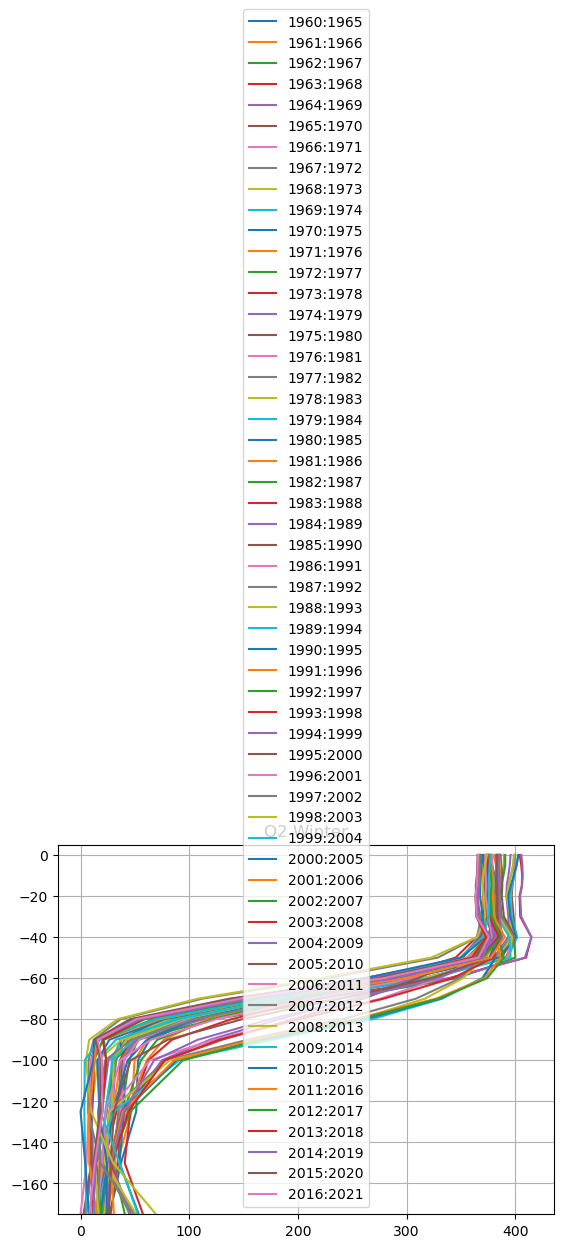

"./resultat/output/6y_back6y_3_xy/O2/Water_body_dissolved_oxygen_concentration_Winter.4Danl.nc"

In [37]:
s = 1
file = joinpath(outputdir, "$(replace(varname,' '=>'_'))_$(seasons[s]).4Danl.nc")
ds = Dataset(file)
ds_name =  ("$(varname)_L2") 
#ds_name = varname
#sel = NCDatasets.@select(ds[ds_name], lon == 20.2 && lat == 57.)
#sel = NCDatasets.@select(ds[ds_name], lon == 19.5 && lat == 57.)
sel = NCDatasets.@select(ds[ds_name], lon == 20. && lat == 57.3)
#sel = NCDatasets.@select(ds[ds_name], lon == 20. && lat == 61.3)
for k=1:length(yearlist)
    toplo = nomissing(sel[:,:,:,k],NaN)
    toplot = vec(toplo)
    plot(toplot,-depthr,label=string(yearlist[k]))
end
ylim(-175,5)
legend();
grid("on")
#title("$(yearlist[k][1]):$(yearlist[k][end])")
title("$(savevar) $(seasons[s])")
close(ds)
@show file

In [38]:
using Pkg
Pkg.status()

Status `C:\Users\a001819\.julia\environments\v1.8\Project.toml`
  [efc8151c] DIVAnd v2.7.9
  [864edb3b] DataStructures v0.18.13
  [7073ff75] IJulia v1.24.0
  [e1d29d7a] Missings v1.1.0
⌃ [85f8d34a] NCDatasets v0.12.11
  [d330b81b] PyPlot v2.11.0
  [44cfe95a] Pkg v1.8.0
Info Packages marked with ⌃ have new versions available and may be upgradable.
